# Polynomial Regression

## Dataset

### Layout

* Columns: 3
	* Position
	* Level
	* Salary
* Rows: 11 observations
	* Each row represents one position
		* Features:
			* Position
			* Level
		* Dependent variable:
			* Salary

### Scenario

**HR Department**

* Department wants to hire a candidate for a specific position
* At the end of the interview process, department wants to know candidate's salary expectation
* Candidate is advanced in career and is asking for $160,000 per year
* Department asks candidate why he/she expects such a high salary?
	* Candidate indicates this is what the candidate earned at a previous position at another company

### Background

* Dataset contains salaries of positions from candidate's previous company
* Data was collected from a 3rd party job site, such as Glassdoor
* Candidate has been in a Region Manager position for the last 2 years
* After 2 years in the same position, candidate should be higher in salary, somewhere between Region Manager and Partner, which is levels 6 and 7, respectively
* Candidate's position will be considered level 6.5

### Wants to Understand

**HR Department**

* Is this salary expectation valid or a bluff?

### Goals

* Build polynomial linear regression to predict previous salary of candidate
	* Predict candidate salary between levels 6 and 7
* Learn how to make a single observation prediction

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [3]:
print(*X[:25], sep='\n')

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]


In [4]:
print(*y[:25], sep='\n')

45000
50000
60000
80000
110000
150000
200000
300000
500000
1000000


## Split Dataset into Training Set and Test Set

Skipping this step to maximize the data in order to make future prediction of salary between levels 6 and 7.

## Train Linear Regression Model on Whole Dataset

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Training is performed on both the simple linear regression and polynomial regression models to compare them to show polynomial regression is more adapted to this dataset.

## Train Polynomial Regression Model on Whole Dataset

* Create a matrix of n-powered features used to train the polynomial regression model:
    * $x_1$
    * $x_1^2$
    * $x_1^n$
* The `degree` parameter is the number of n-powered features
* `X_poly` is the polynomial matrix of n-powered features
* `lin_poly_reg` is the polynomial regression using the `X_poly` matrix of features to train the model

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression()

## Visualize Linear Regression Results

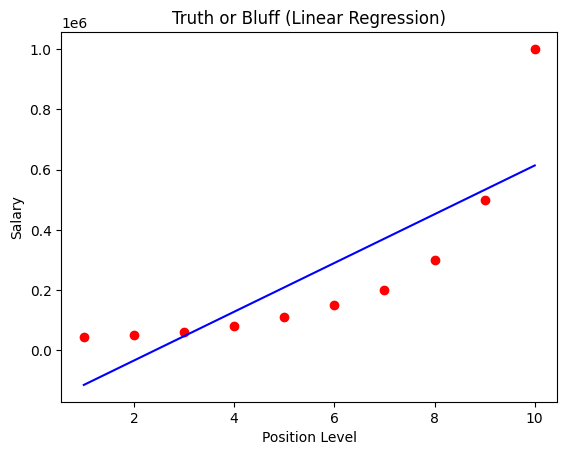

In [7]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize Polynomial Regression Results

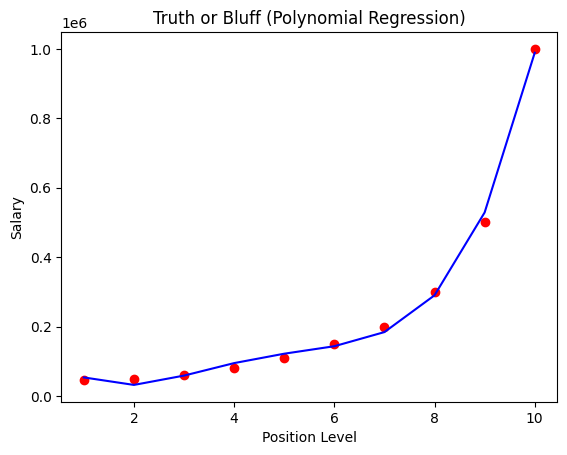

In [8]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_poly.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Result:** polynomial regression model predictions are well adapted for the use case.

## Visualize Polynomial Regression Results

### For Higher Resolution and Smoother Curve

The curve can be made smoother as a result of increasing the density of the position of features by including, not only integer values, but also values in between each by $0.1$.

For example: $1.1, 1.2, ..., 1.9$

This is done via the `arange` method with a density parameter of $0.1$.

In [9]:
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.1)

In [10]:
print(*X_grid[:25], sep='\n')

1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000004
1.5000000000000004
1.6000000000000005
1.7000000000000006
1.8000000000000007
1.9000000000000008
2.000000000000001
2.100000000000001
2.200000000000001
2.300000000000001
2.4000000000000012
2.5000000000000013
2.6000000000000014
2.7000000000000015
2.8000000000000016
2.9000000000000017
3.0000000000000018
3.100000000000002
3.200000000000002
3.300000000000002
3.400000000000002


In [11]:
X_grid = X_grid.reshape(len(X_grid), 1)

In [12]:
print(*X_grid[:25], sep='\n')

[1.]
[1.1]
[1.2]
[1.3]
[1.4]
[1.5]
[1.6]
[1.7]
[1.8]
[1.9]
[2.]
[2.1]
[2.2]
[2.3]
[2.4]
[2.5]
[2.6]
[2.7]
[2.8]
[2.9]
[3.]
[3.1]
[3.2]
[3.3]
[3.4]


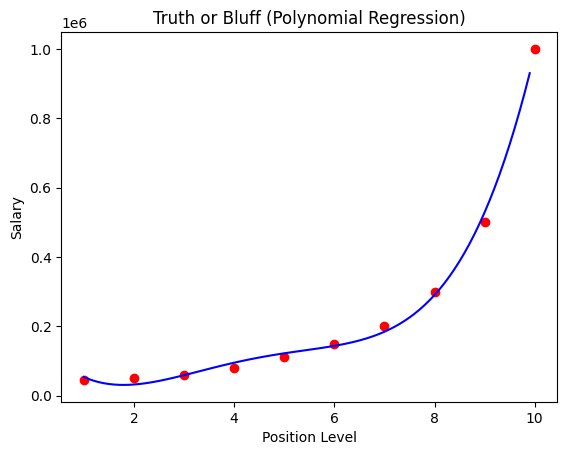

In [13]:
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_poly.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Result:** polynomial regression model predictions are more well adapted with higher resolution and smoother curve for the use case.

## Predict New Result with Linear Regression

Predict the salary at position level 6.5 with linear regression.

In [14]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Linear regression model predicts a salary more than double that of $\$160,000$. Bad prediction.

## Predict New Result with Polynomial Regression

Predict a salary at position level 6.5 with polynomial regression.

In [15]:
lin_reg_poly.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265154])

Polynomial regression model predicts a salary very close to $\$160,000$. Good prediction.

**One is confident the salary expectation of the candidate is valid.**